In [1]:
import math
import random
import numpy as np
from typing import List, ClassVar, Callable
import matplotlib.pyplot as plot


In [4]:
class Person:
    def __init__(self, traits: List[float], fitness_function: ClassVar):
        self.fitness: float or None = None
        self.traits = traits

        self.retrospective_coefficient = 0.2
        self.fitness_function: ClassVar = fitness_function

    def calculate_fitness(self):
        self.fitness = self.fitness_function.run(self.traits)

    def improve_traits_from(self, other_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = self.retrospective_coefficient * old_trait + random.random() * (other_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def acquire_traits_from(self, other_person: Person, best_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = old_trait + random.random() * (old_trait - other_person.traits[i]) + random.random() * (best_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def has_better_fitness_than(self, other_person: Person) -> bool:
        return self.fitness_function.person_has_better_fitness_than(other_person, self)


In [5]:
class stepFunction:
    @staticmethod
    def run(traits:List)->float:
        return sum(((math.floor(i+0.5))**2) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness
    

In [6]:
class PersonMaker:
    def __init__(self, person_count: int, traits_count: int,traits_range_min: float, traits_range_max: float):
        self.person_count = person_count
        self.traits_count = traits_count
        self.traits_range_min = traits_range_min
        self.traits_range_max = traits_range_max
    def make_persons_with_traits_and_fitness_function(self,make_traits: Callable,fitness_function: ClassVar) -> List[Person]:
        persons = []
        for i in range(0, self.person_count):
            traits = make_traits()
            person = Person(traits, fitness_function)
            persons.append(person)
        return persons
    def make_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            traits.append(value)
        return traits
    def make_rounded_off_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            value = math.ceil(value) if math.ceil(value) <self.traits_range_max else math.floor(value)
            traits.append(value)
        return traits
    def select_elite(self, population: List[Person]) -> Person:
        best_person = min(population, key=lambda x: x.fitness)
        return best_person


In [7]:
class PopulationGroupE:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        elite_person=min(self.population, key=lambda x: x.fitness)
        for _ in range(0, self.generations):
            least_fit_index = max(range(len(self.population)), key=lambda i: self.population[i].fitness)
            least_fit_person = self.population[least_fit_index]
            self.population[least_fit_index] = elite_person
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()
            elite_person = self.person_maker.select_elite(self.population)

    

In [8]:
class PopulationGroup:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        for _ in range(0, self.generations):
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()

    

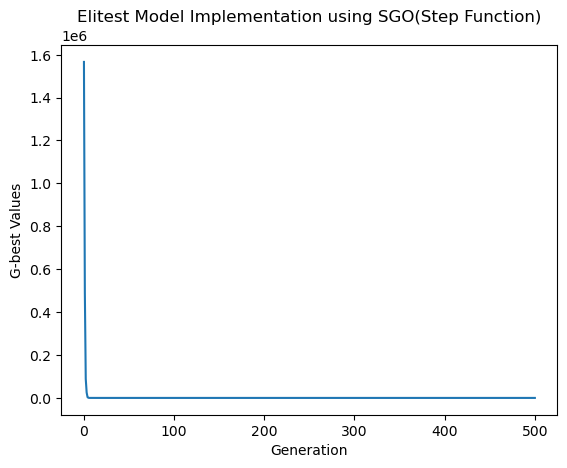

In [9]:
generation_value = 500
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=stepFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Step Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [13]:
print("gbest Values:")
print(y_axis)

gbest Values:
[1566185, 490674, 88527, 25140, 3271, 697, 75, 25, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

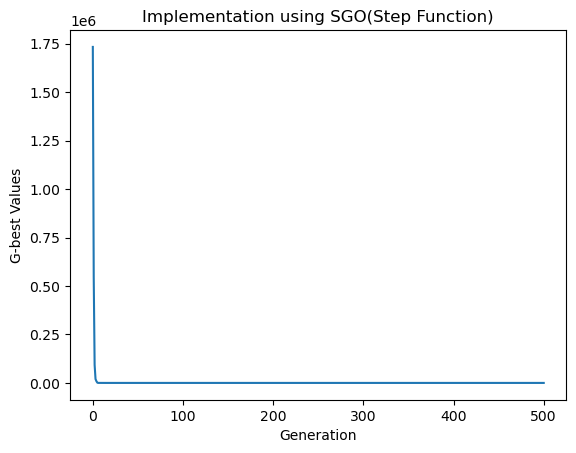

In [24]:
generation_value = 500
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=stepFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Implementation using SGO(Step Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [25]:
print("gbest Values:")
print(y_axis)

gbest Values:
[1733752, 547162, 92810, 19759, 8771, 1169, 128, 47, 14, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

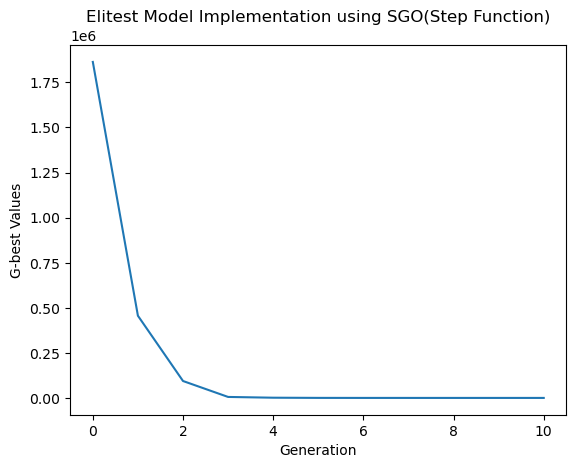

In [16]:
generation_value = 10
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=stepFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Step Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [17]:
print("gbest Values:")
print(y_axis)

gbest Values:
[1863453, 455762, 93801, 5425, 1203, 200, 23, 1, 0, 0, 0]


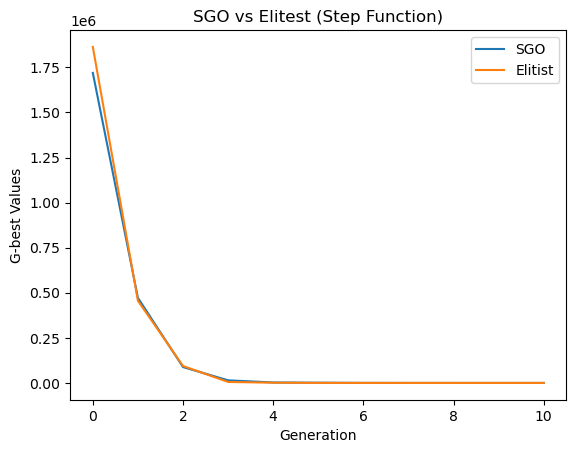

In [18]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=stepFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('SGO vs Elitest (Step Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis, label='SGO')
plot.plot(x_axis, y1_axis, label='Elitist')
plot.legend()


plot.draw()
plot.show()

In [19]:
print("gbest Values:")
print(y_axis)

gbest Values:
[1719370, 471685, 87991, 14393, 2474, 1307, 218, 44, 11, 2, 0]
